In [1]:
import os

In [94]:
path_data = '/home/pbellec/data/dypac_proj/movie10/'
file = os.path.join(path_data, 'sub-03_ses-001_task-bourne02_space-MNI152NLin2009cAsym_desc-preproc_bold_dypac.npy')
parcels = '/home/pbellec/data/dypac/embeddings/first_run/sub-03_runs44_cluster50_states150_batches10_reps100.pickle'

In [95]:
model.embedding.transform_mat.shape

(152459, 151)


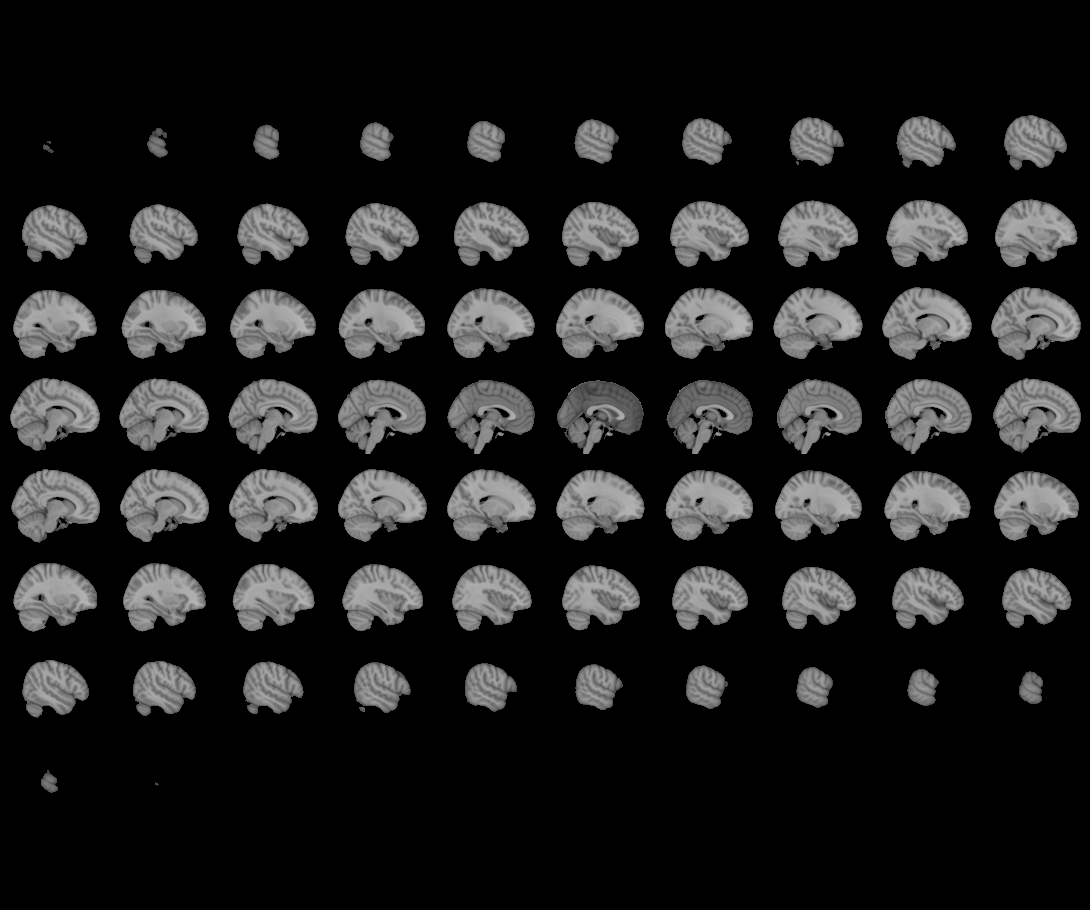
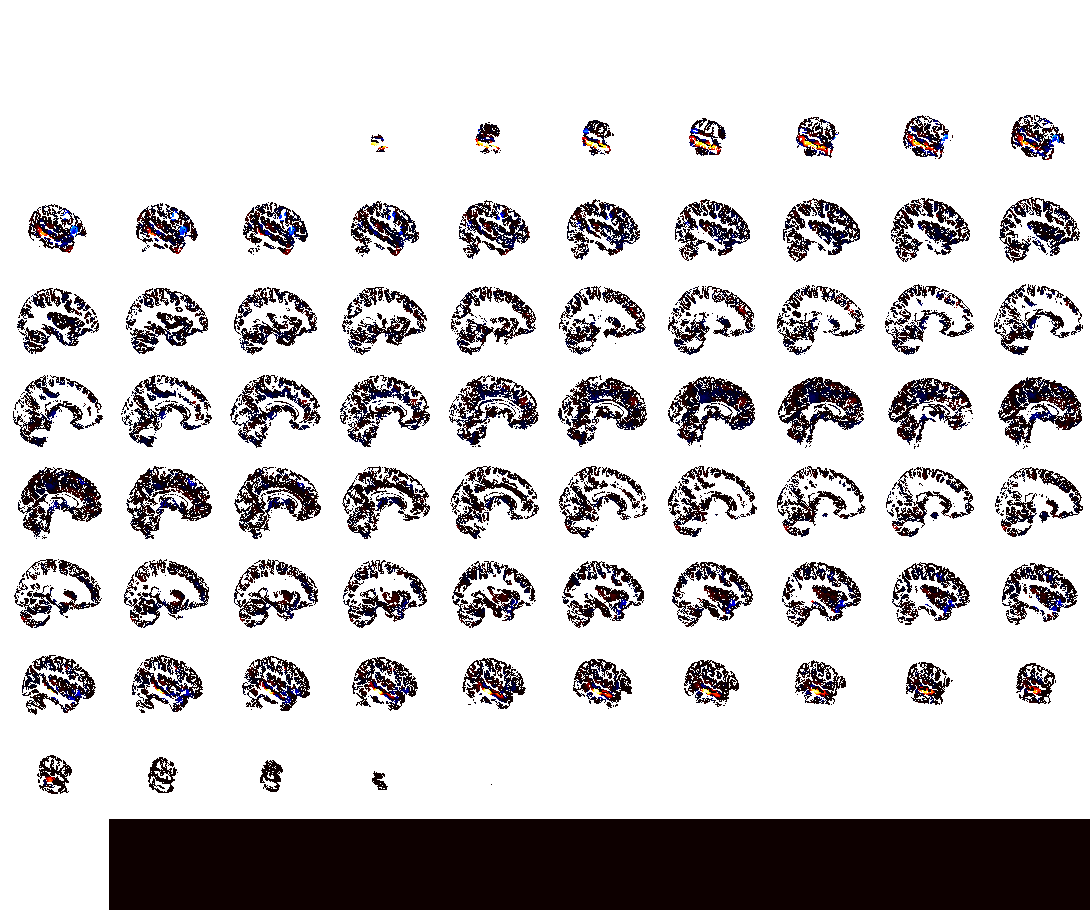

In [79]:
comp_img = model.masker_.inverse_transform(model.embedding.transform_mat[:, 22].transpose()) # note the sneaky shift to 1-indexing
plotting.view_img(comp_img, title="functional networks", colorbar=True, 
                  black_bg=True, threshold=0.00001)

Load the DYPAC parcels 

In [80]:
import pickle as pl
hf = open(parcels, 'rb')
model = pl.load(hf)
hf.close()

In [97]:
import numpy as np
tseries = np.load(file)

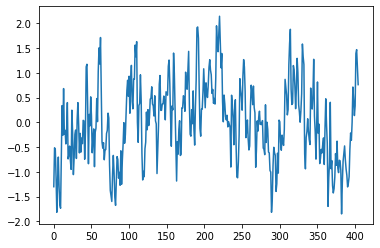

In [98]:
import matplotlib.pyplot as plt
plt.plot(tseries[:, 27])

In [99]:
from nilearn.connectome import ConnectivityMeasure
conn = np.squeeze(ConnectivityMeasure(kind='correlation').fit_transform([tseries]))

/home/pbellec/env/dypac/lib/python3.8/site-packages/nilearn/plotting/matrix_plotting.py:12: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  ylabel_width = ax.yaxis.get_tightbbox(renderer).inverse_transformed(
/home/pbellec/env/dypac/lib/python3.8/site-packages/nilearn/plotting/matrix_plotting.py:20: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  xlabel_height = ax.xaxis.get_tightbbox(renderer).inverse_transformed(


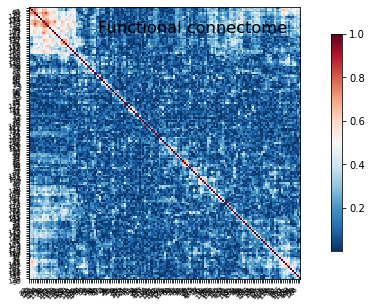

In [100]:
from nilearn import plotting
# Plot the connectome, with no particular region order
plotting.plot_matrix(np.abs(conn), labels = range(151), title='Functional connectome', reorder='average')

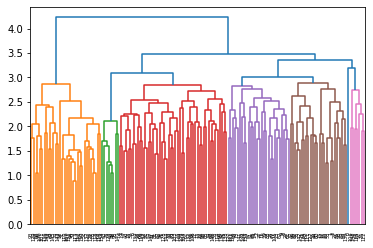

In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
# That's the hierarchical clustering step
hier = linkage(conn, method='average', metric='euclidean') # scipy's hierarchical clustering
# HAC proceeds by iteratively merging brain regions, which can be visualized with a tree
res = dendrogram(hier, get_leaves=True) # Generate a dendrogram from the hierarchy

In [102]:
# We can cut the tree at whatever number of clusters we choose (here 17, because 17 is good)
part = np.squeeze(cut_tree(hier, n_clusters=30)) # Cut the hierarchy

In [105]:
part

array([ 0,  1,  2,  1,  3,  4,  3,  3,  5,  5,  1,  4,  6,  7,  2,  8,  9,
        8,  3,  3,  5, 10,  7,  5, 11, 12,  3, 13,  5, 11, 14, 15,  3,  8,
       16, 13, 10, 17, 11, 15, 18,  6, 15, 18, 19, 16,  3, 20, 18, 21, 13,
       20, 15,  1, 22, 19, 16,  6, 23, 11, 19,  5,  5, 15,  7, 16,  3,  7,
       16, 22, 24, 11,  7, 24, 22, 25,  2,  5, 18,  4, 19,  6, 10, 26, 15,
       15, 20,  6,  5, 13, 26,  7,  6, 26, 15, 18, 27,  9, 13, 17, 26, 26,
       21, 11, 14,  5, 28, 21,  7, 15, 15, 19,  9, 15, 16, 12, 15, 15, 15,
        3, 24, 24, 15, 18, 10, 11, 24, 19, 11, 26, 13, 15, 25,  7, 18, 14,
       22, 15, 25,  3, 18, 29, 10, 22, 11, 22, 16,  6, 28, 22, 15])


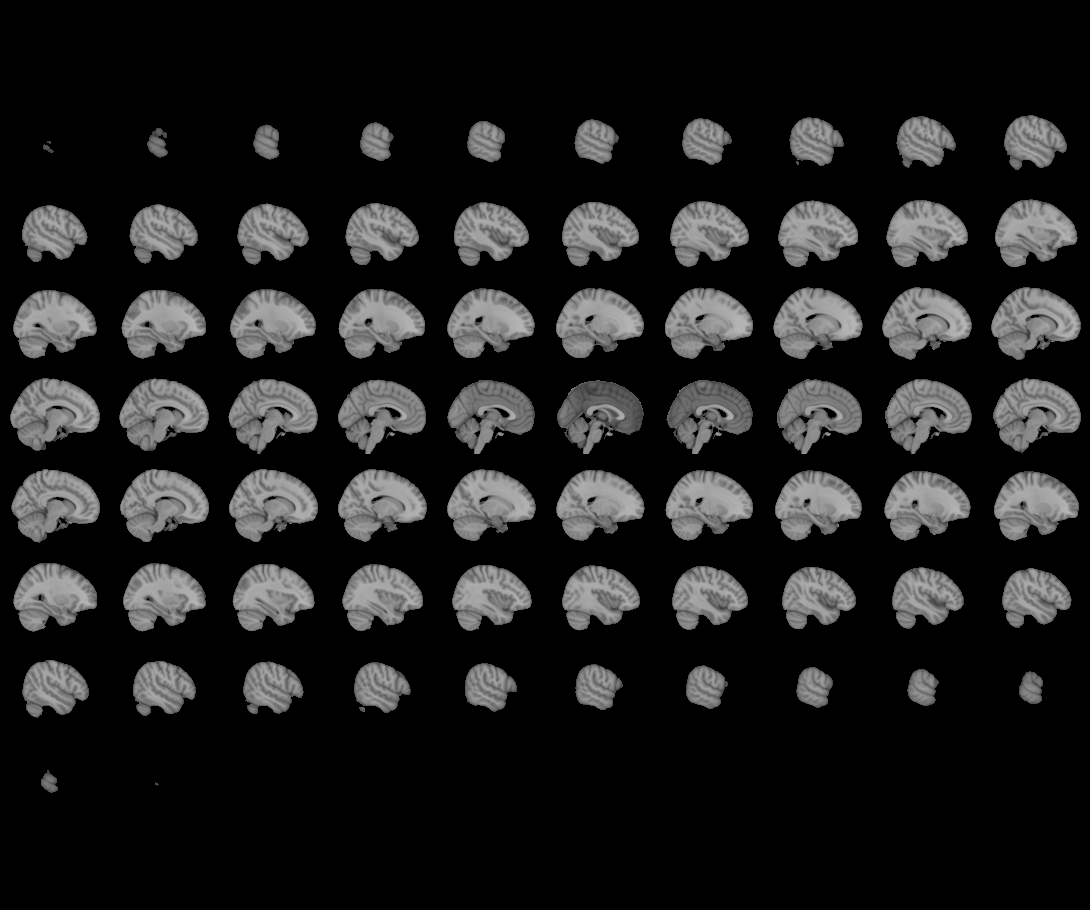
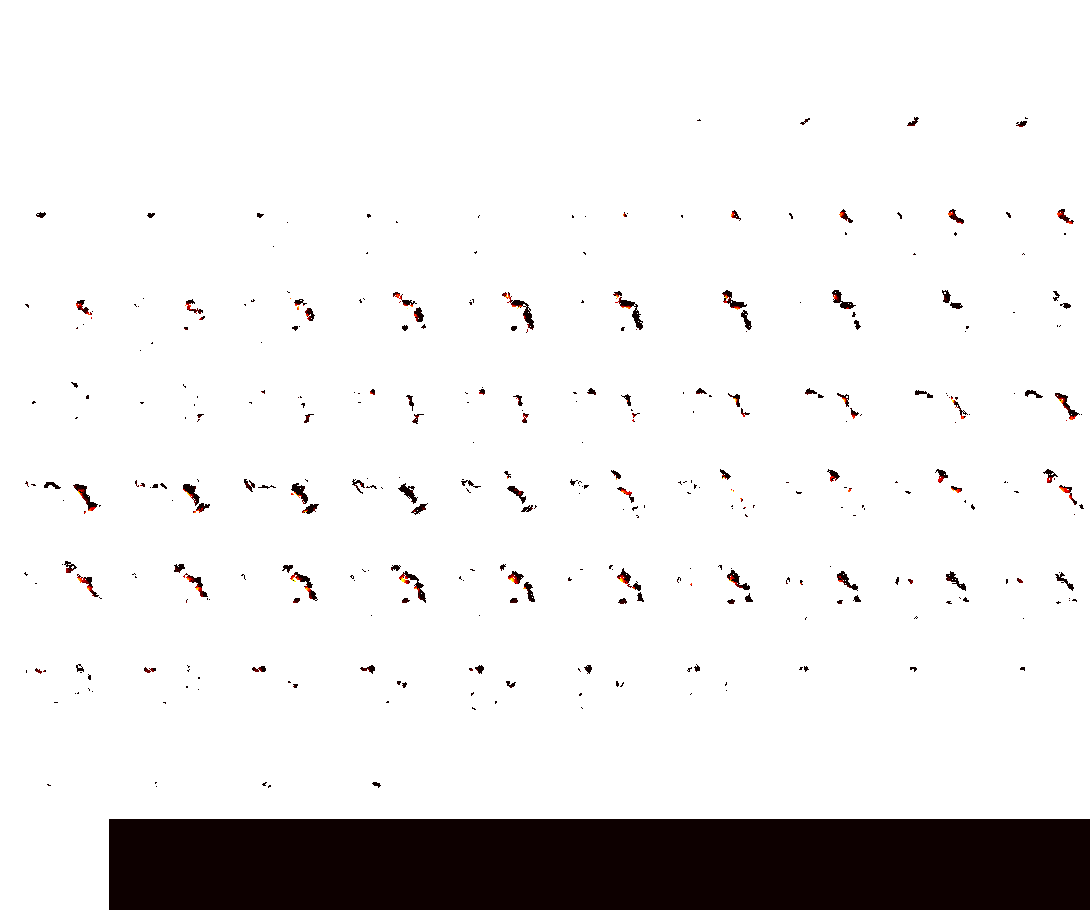

In [143]:
part_img = model.inverse_transform(part.reshape([1, 151]) == 29) # note the sneaky shift to 1-indexing
plotting.view_img(part_img, title="functional networks", colorbar=True, 
                  black_bg=True, symmetric_cmap=True, threshold=0.1)


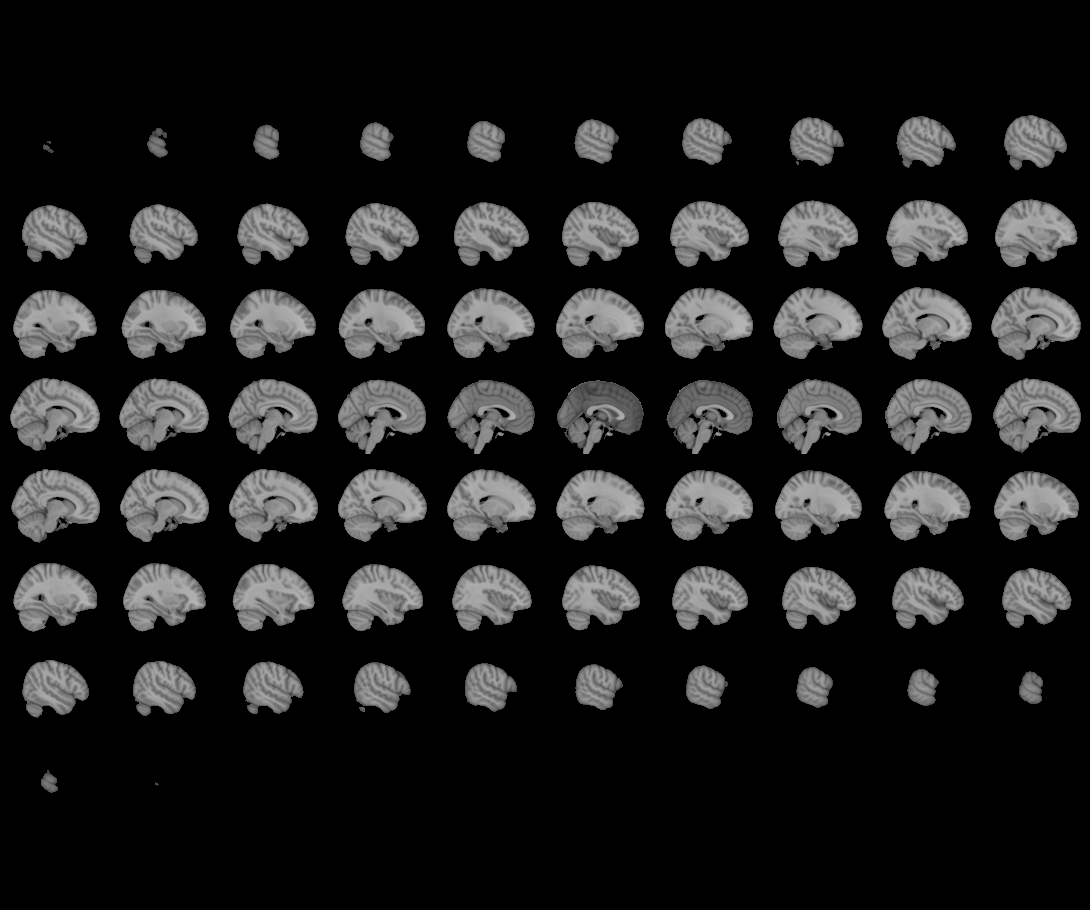
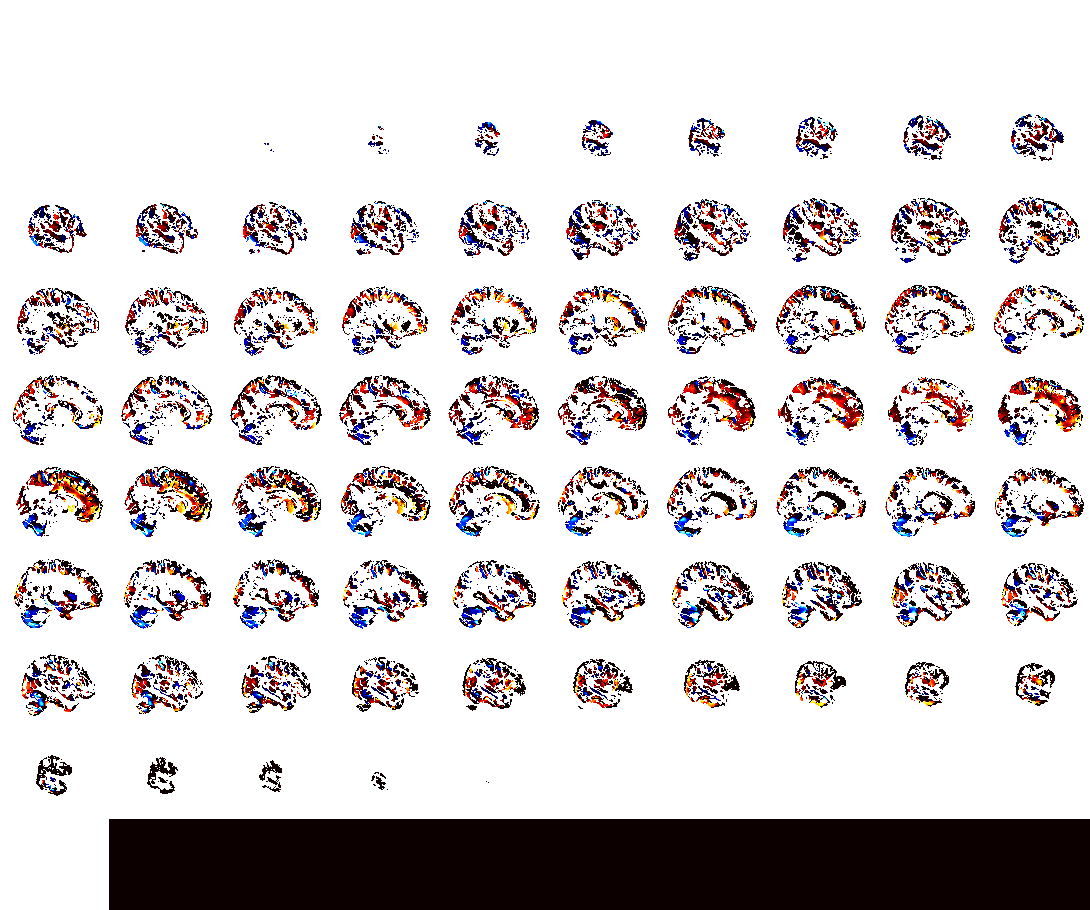

In [182]:
conn_img = model.inverse_transform(conn[31, :]) # note the sneaky shift to 1-indexing
plotting.view_img(conn_img, title="functional networks", colorbar=True, 
                  black_bg=True, symmetric_cmap=True, threshold=0.1, vmax=1)